In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold

In [73]:
#read dataset
df = pd.read_csv('seed_dataset.csv')
df.shape

(2500, 13)

In [74]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [76]:
#count the number of missing (NaN) values in each column of a dataset
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [77]:
# describe object
df.describe(include='O')

,Class
count,2500
unique,2
top,Çerçevelik
freq,1300


In [78]:
# inplace change column in the actual dataset
df.replace({'Class':{'Çerçevelik':0,'Ürgüp Sivrisi':1}},inplace=True)
df

C:\Users\Nancy Mongy\AppData\Local\Temp\ipykernel_13060\2902107499.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Class':{'Çerçevelik':0,'Ürgüp Sivrisi':1}},inplace=True)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


In [79]:
# Checking duplicated data
print('Number of duplicated data : ' , len(df[df.duplicated()]))

Number of duplicated data :  0


In [80]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121,0.4800
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067,0.4997
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800,0.0000
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475,0.0000
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700,0.0000
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500,1.0000
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900,1.0000


In [81]:
df.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984,-0.236076
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308,-0.669514


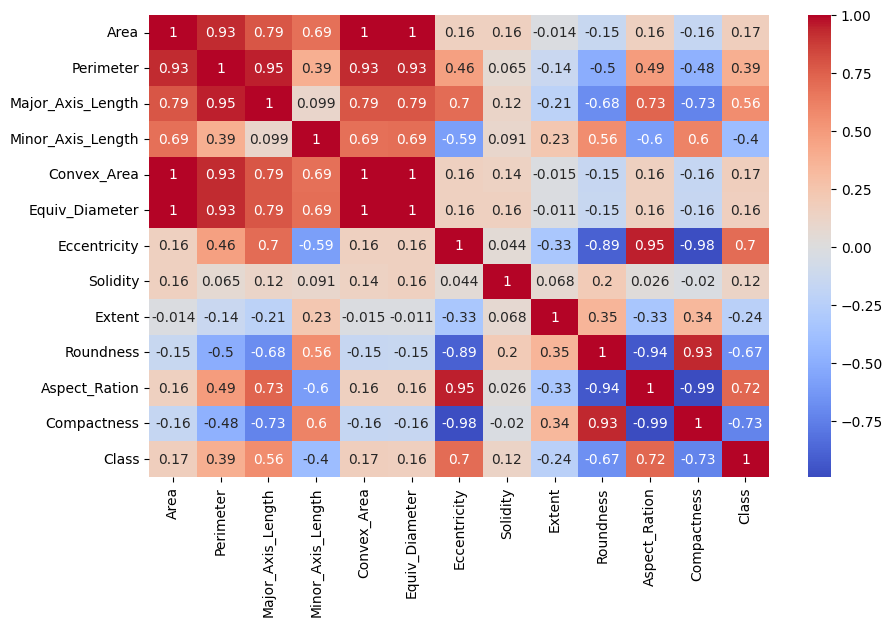

In [82]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness', 'Class']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [83]:
# Columns that have high corr with some other columns
df = df.drop(['Convex_Area'],axis=1)
df = df.drop(['Equiv_Diameter'],axis=1)
df = df.drop(['Eccentricity'],axis=1)
df = df.drop(['Aspect_Ration'],axis=1)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Solidity,Extent,Roundness,Compactness,Class
0,56276,888.242,326.1485,220.2388,0.9902,0.7453,0.8963,0.8207,0
1,76631,1068.146,417.1932,234.2289,0.9916,0.7151,0.8440,0.7487,0
2,71623,1082.987,435.8328,211.0457,0.9857,0.7400,0.7674,0.6929,0
3,66458,992.051,381.5638,222.5322,0.9902,0.7396,0.8486,0.7624,0
4,66107,998.146,383.8883,220.4545,0.9850,0.6752,0.8338,0.7557,0
...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,0.9907,0.4888,0.6672,0.5973,1
2496,69647,1084.318,462.9416,191.8210,0.9919,0.6002,0.7444,0.6433,1
2497,87994,1210.314,507.2200,222.1872,0.9920,0.7643,0.7549,0.6599,1
2498,80011,1182.947,501.9065,204.7531,0.9890,0.7374,0.7185,0.6359,1


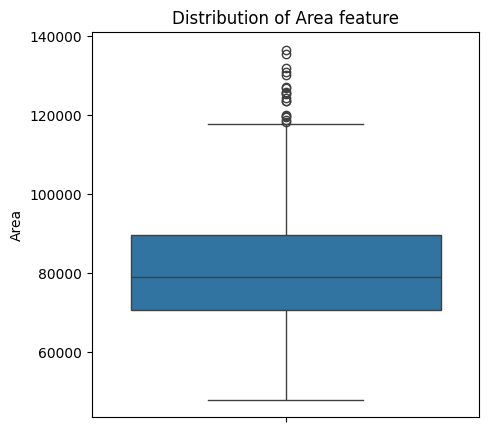

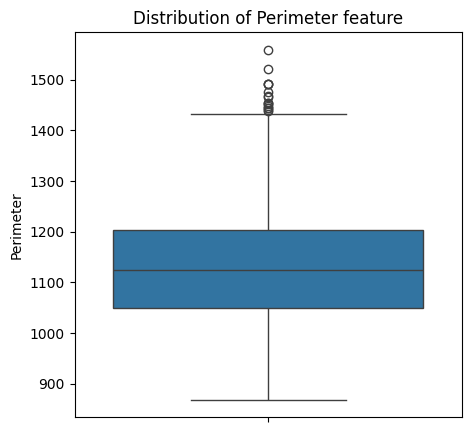

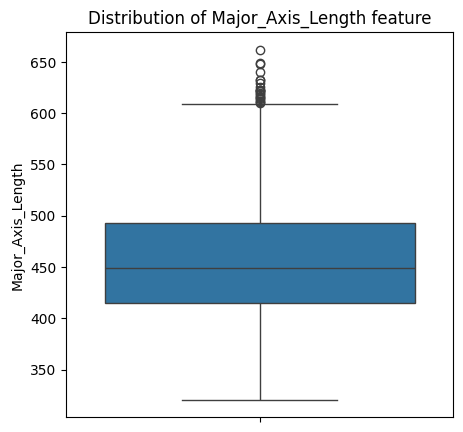

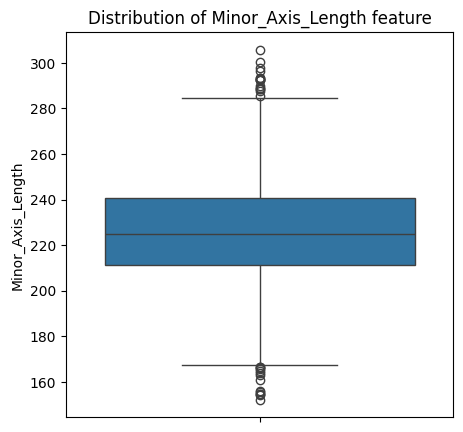

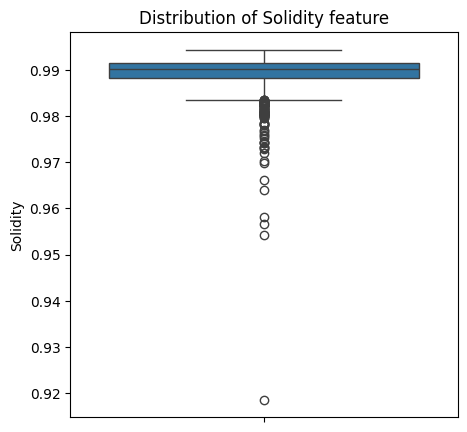

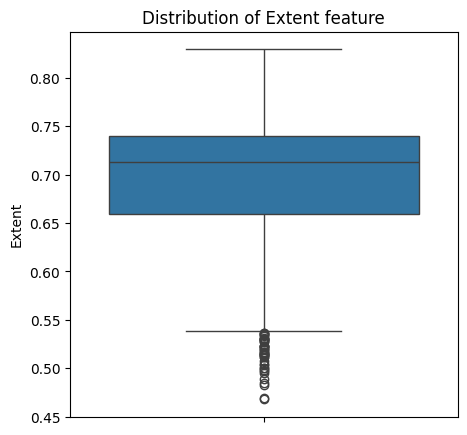

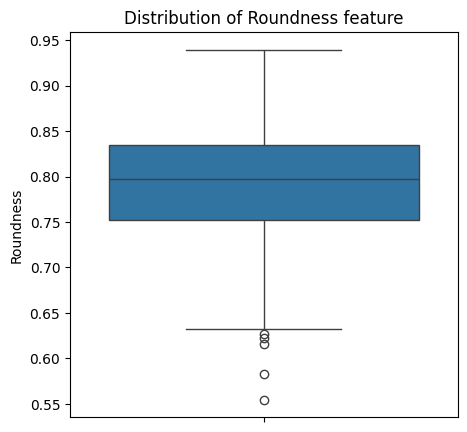

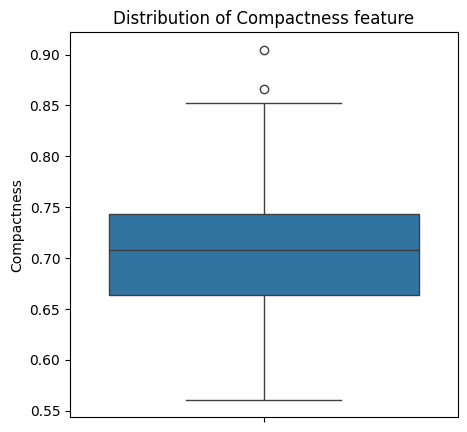

In [84]:
# Box plot to visualize outliers
plotted_columns = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Solidity', 'Extent', 'Roundness', 'Compactness']]
for col in plotted_columns.columns:
    plt.figure(figsize=(5,5))
    ax = sns.boxplot(df[col])
    ax.set_title(f'Distribution of {col} feature')
    plt.show()

In [85]:
def handle_outliers(dataframe, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    df.loc[(df[col] > upper_bound,col)] = upper_bound
    df.loc[(df[col] < lower_bound,col)] = lower_bound
    
    return df
# Call function to return df_no_outliers
for col in df.select_dtypes(include=["number"]).columns :
    df = handle_outliers(df, col)

C:\Users\Nancy Mongy\AppData\Local\Temp\ipykernel_13060\3641305825.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '118246.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] > upper_bound,col)] = upper_bound
C:\Users\Nancy Mongy\AppData\Local\Temp\ipykernel_13060\3641305825.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] > upper_bound,col)] = upper_bound


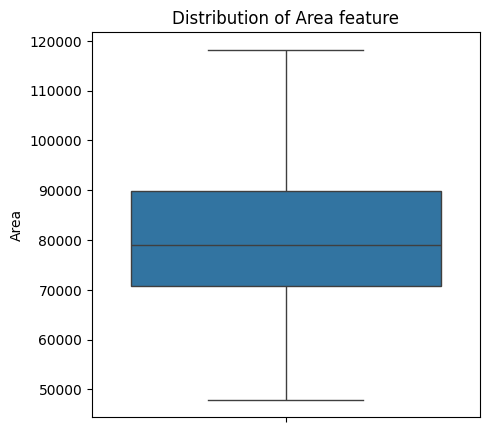

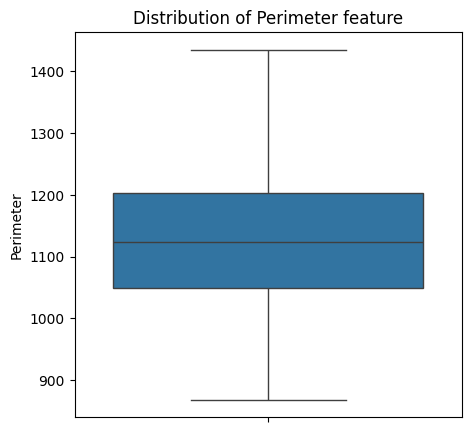

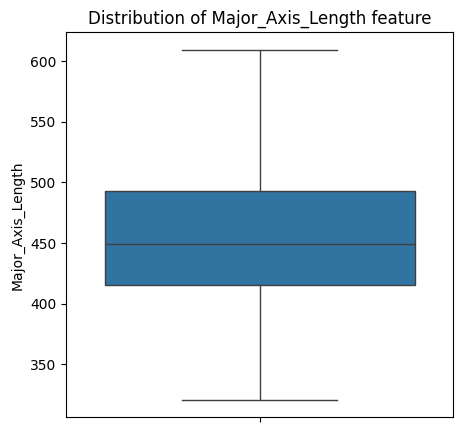

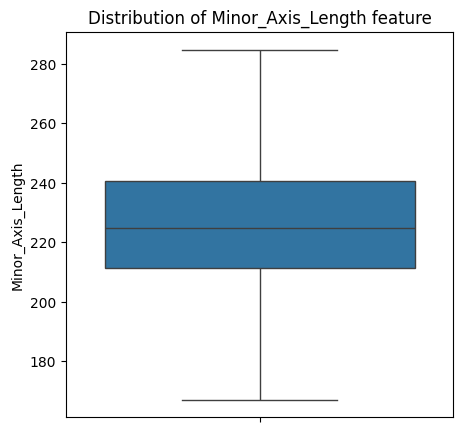

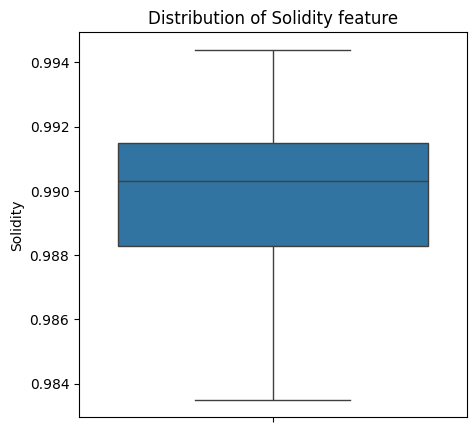

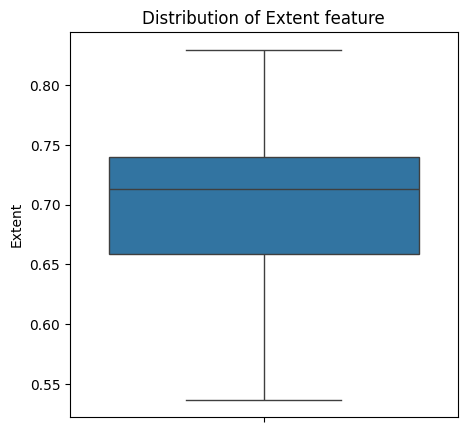

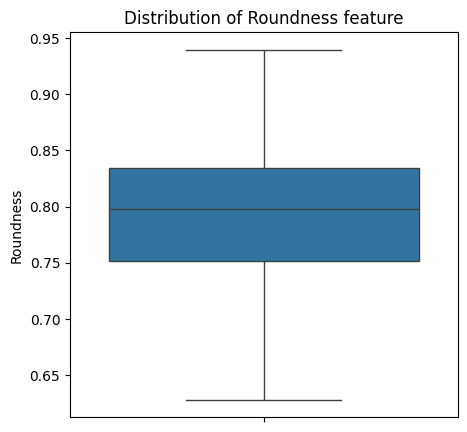

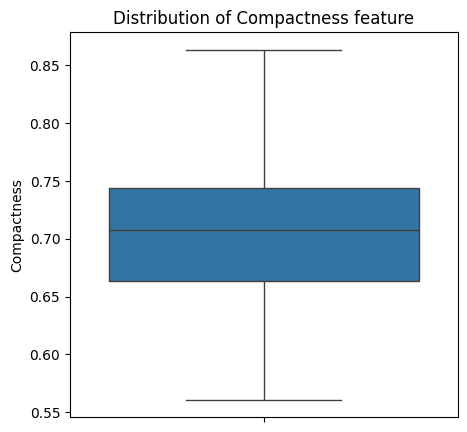

In [86]:
# Box plot to visualize outliers after cleaning the dataframe
for col in plotted_columns.columns:
    plt.figure(figsize=(5,5))
    ax = sns.boxplot(df[col])
    # f (format) we use it with variables
    ax.set_title(f'Distribution of {col} feature')
    plt.show()

In [87]:
df.var()

Area                 1.820272e+08
Perimeter            1.178073e+04
Major_Axis_Length    3.116618e+03
Minor_Axis_Length    5.310785e+02
Solidity             6.106843e-06
Extent               3.569118e-03
Roundness            3.106191e-03
Compactness          2.809751e-03
Class                2.496999e-01
dtype: float64

In [88]:
# # Normalization using log
# df["log_2_Area"] = np.log(df["Area"])
# df["log_2_Perimeter"] = np.log(df["Perimeter"])
# df["log_2_Major_Axis_Length"] = np.log(df["Major_Axis_Length"])
# df["log_2_Minor_Axis_Length"] = np.log(df["Minor_Axis_Length"])
# df

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_scaled = pd.concat([X_scaled, y], axis=1)

In [90]:
df_scaled.var()

Area                 1.0004
Perimeter            1.0004
Major_Axis_Length    1.0004
Minor_Axis_Length    1.0004
Solidity             1.0004
Extent               1.0004
Roundness            1.0004
Compactness          1.0004
Class                0.2497
dtype: float64

In [91]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
Y = df_scaled['Class']
X = df_scaled.drop(columns=['Class'])

display(X)
display(Y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X , Y , test_size=0.3 , random_state=42,  shuffle= True) #70% training and 30% test

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Solidity,Extent,Roundness,Compactness
0,-1.803543,-2.228266,-2.334762,-0.240541,0.206079,0.865388,1.879175,2.200094
1,-0.294541,-0.570430,-0.703590,0.366654,0.772718,0.359781,0.940588,0.841513
2,-0.665805,-0.433668,-0.369640,-0.639538,-1.615261,0.776656,-0.434092,-0.211387
3,-1.048708,-1.271654,-1.341932,-0.141004,0.206079,0.769959,1.023141,1.100020
4,-1.074729,-1.215488,-1.300286,-0.231180,-1.898581,-0.308223,0.757537,0.973597
...,...,...,...,...,...,...,...,...
2495,-0.071693,0.872326,1.373935,-1.534006,0.408450,-2.623428,-2.232302,-2.015281
2496,-0.812294,-0.421403,0.116046,-1.473924,0.894140,-1.563871,-0.846855,-1.147299
2497,0.547847,0.739665,0.909345,-0.155977,0.934615,1.183486,-0.658419,-0.834070
2498,-0.043967,0.487475,0.814148,-0.912648,-0.279612,0.733127,-1.311661,-1.286931


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2495    1.0
2496    1.0
2497    1.0
2498    1.0
2499    1.0
Name: Class, Length: 2500, dtype: float64

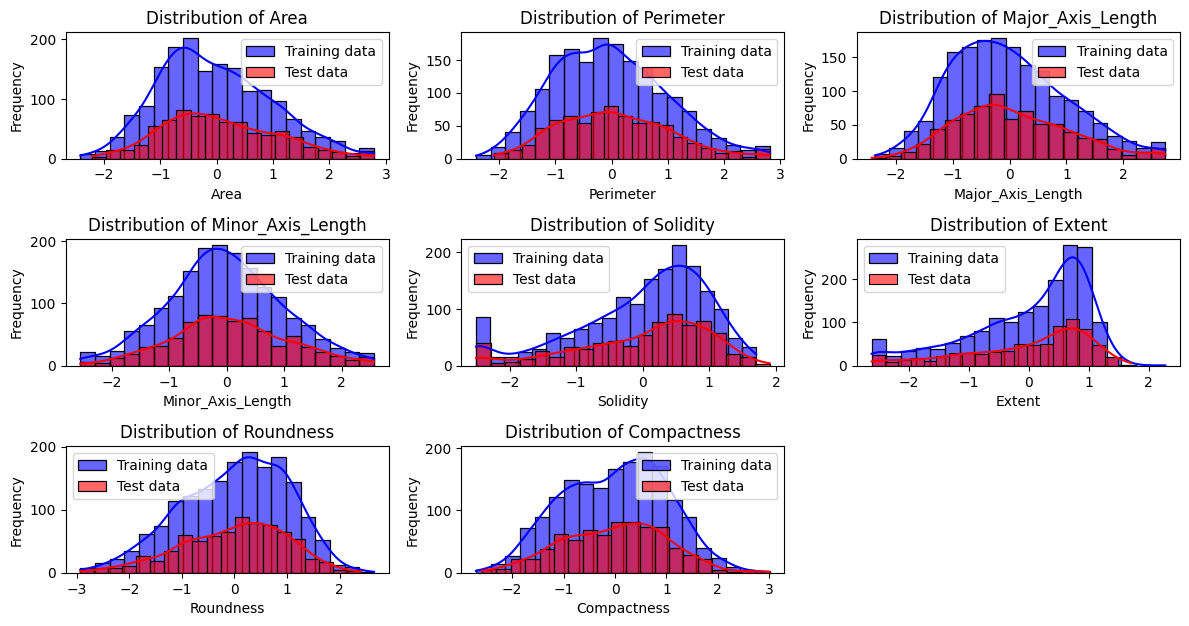

In [92]:
# Convert X_train and X_test to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
feature_names = df.columns
# Create a figure to visualize data distribution
plt.figure(figsize=(12, 8))

# Number of features
num_features = X.shape[1]

# Iterate through each feature and plot its distribution
for i in range(num_features):
    plt.subplot(4, 3, i + 1)

    # Plot histogram and KDE (Kernel Density Estimate)
    sns.histplot(X_train[: , i], kde=True, bins=20, color='blue', alpha=0.6, label='Training data')
    sns.histplot(X_test[: , i], kde=True, bins=20, color='red', alpha=0.6, label='Test data')

    # Add labels and title
    plt.xlabel(feature_names[i])
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature_names[i]}')
    plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [93]:
# Take the same proportion for the training and test sets
X_train,X_test,y_train,y_test = train_test_split(X , Y , stratify = Y , random_state=42)
y_train_df = pd.DataFrame(y_train, columns=['Class'])
y_test_df = pd.DataFrame(y_test, columns=['Class'])
print("Total number per two classes")
print(df["Class"].value_counts())
print("\n")
print("Total number per two classes for training")
print(y_train_df["Class"].value_counts())
print("\n")
print("Total number per two classes for testing")
print(y_test_df["Class"].value_counts())

Total number per two classes
Class
0.0    1300
1.0    1200
Name: count, dtype: int64


Total number per two classes for training
Class
0.0    975
1.0    900
Name: count, dtype: int64


Total number per two classes for testing
Class
0.0    325
1.0    300
Name: count, dtype: int64


In [94]:
#Import svm model
from sklearn import svm

# Create a svm Classifier
# C hyperparameter that controls the distance between the decision boundary and the closest support vectors and minimizing the classification error
clf = svm.SVC(kernel='linear',C=100, probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [95]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.872


In [96]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(clf, X, y, cv=kf)

# Calculate the average score
average_score = np.mean(scores)

# Print the results
print(f'Cross-validation scores: {scores}')
print(f'Average score: {average_score}')

Cross-validation scores: [0.866 0.888 0.886 0.882 0.886]
Average score: 0.8816


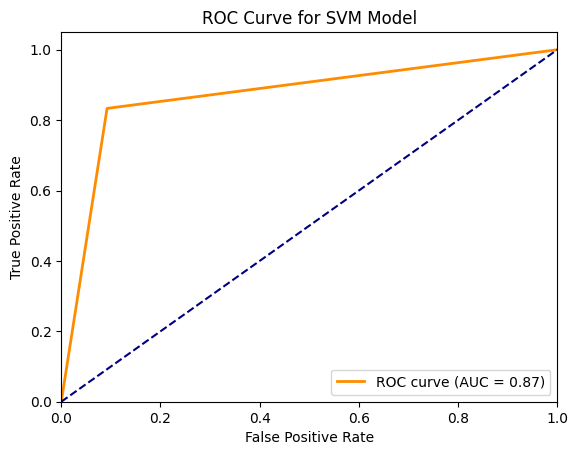

In [97]:
from sklearn.metrics import roc_curve, auc
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc='lower right')
plt.show()


Classification report : 
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       325
         1.0       0.89      0.83      0.86       300

    accuracy                           0.87       625
   macro avg       0.87      0.87      0.87       625
weighted avg       0.87      0.87      0.87       625



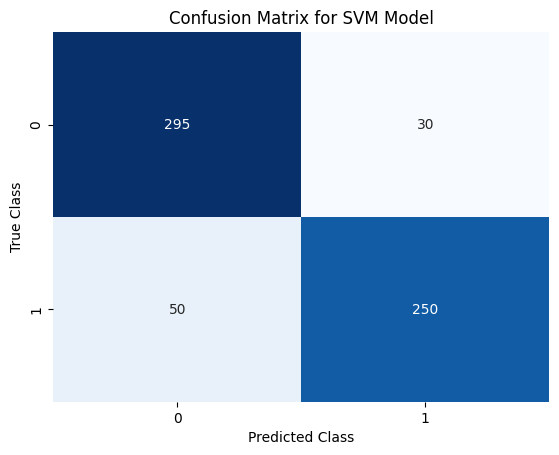

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print ('Classification report : ')
print(report)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for SVM Model')
plt.show()

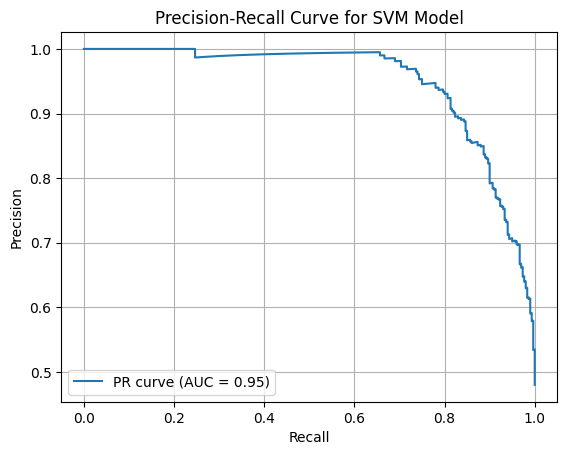

In [99]:
from sklearn.metrics import precision_recall_curve, auc
# Get predicted probabilities for the test set
y_scores = clf.predict_proba(X_test)[:, 1]  # Scores for the positive class

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate AUC (Area Under Curve)
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Model')
plt.legend()
plt.grid(True)
plt.show()

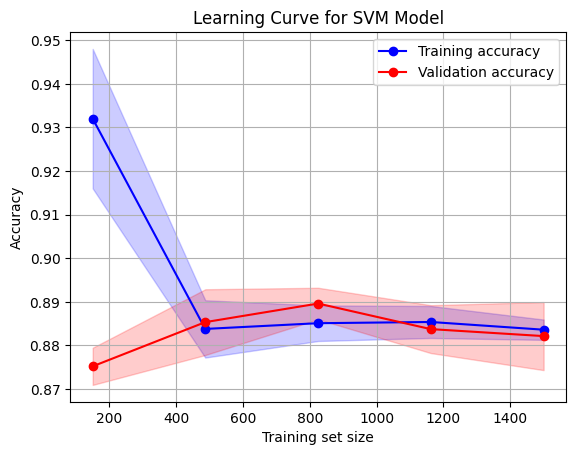

In [100]:
from sklearn.model_selection import learning_curve
# Define the training set sizes to test
train_sizes, train_scores, test_scores = learning_curve(
    estimator=clf,
    X=X_train,
    y=y_train,
    cv=5,  # Number of cross-validation folds
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy',  # Metric to evaluate
    n_jobs=-1  # Use all available CPU cores
)

# Calculate the mean and standard deviation for the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Validation accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for SVM Model')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
Area = float(input('Enter the Area : '))
Perimeter = float(input('Enter the Perimeter : '))
Major_Axis_Length = float(input('Enter the Major_Axis_Length : '))
Minor_Axis_Length = float(input('Enter the Minor_Axis_Length : '))
Solidity = float(input('Enter the Solidity : '))
Extent = float(input('Enter the Extent : '))
Roundness = float(input('Enter the Roundness : '))
Compactness = float(input('Enter the Compactness : '))

prediction = clf.predict(scaler.transform([[Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Solidity, Extent, Roundness, Compactness]]))

if prediction == 0:
    print('Çerçevelik')
else:
    print('Ürgüp Sivrisi')